In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=75
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Arial'})

In [3]:
# set of species names
species = ['AC', 'BA', 'BC', 'BL', 'BT', 'BV', 'CC', 'DF', 'wt', 'delarc', 'parc-', 'parc+']

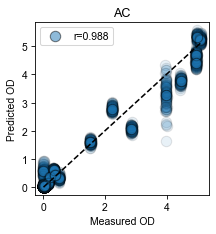

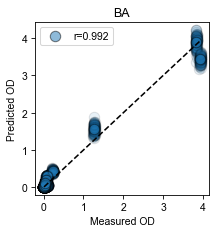

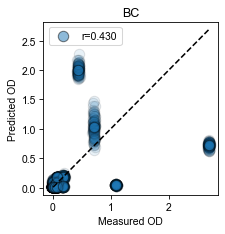

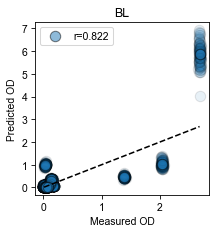

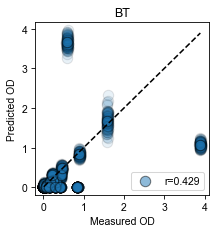

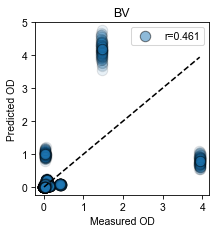

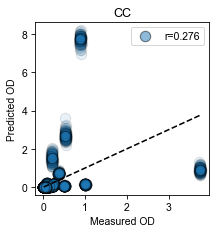

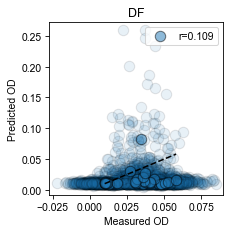

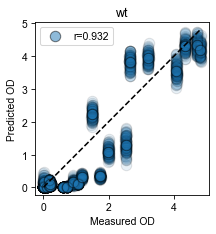

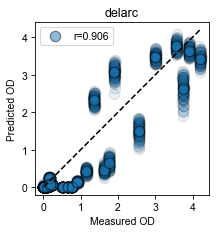

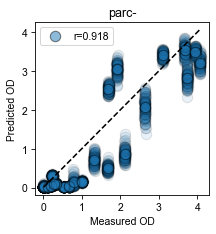

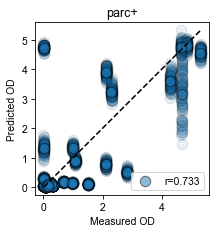

In [5]:
for sp in species:
    
    plt.figure(figsize=(3,3))
    # Sample DataFrame (replace this with your actual DataFrame)
    df = pd.read_csv(f"kfold/{sp}.csv")

    # Ignore initial condition and extreme initial pHs
    df_t = df.iloc[df.Time.values>0]

    # measured values
    y = np.array(df_t[sp+'_OD'].values, float)

    # prediction distribution
    predictions = np.array(df_t.values[:, 3:], float)
    
    # mean prediction 
    pred = np.mean(predictions, 1)

    # plot spread in predictions
    for i in range(100):
        plt.scatter(y+np.random.randn(len(y))*.01, predictions[:, i], alpha=.1, c='C0', edgecolor='k', s=100)

    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(y, pred)
    plt.scatter(y, pred, alpha=.5, c='C0', edgecolor='k', s=100, label='r={:.3f}'.format(correlation))
        
    # Add line of perfect agreement
    plt.plot([min(y), max(y)],
             [min(y), max(y)],
             linestyle='--', color='k')
        
    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(sp)
    plt.savefig('Figures/'+sp+'_kfold.svg')
    plt.show()